In [2]:
# Import necessary libraries for data analysis, visualization, and API interaction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as r
import tweepy as twp
import json 
import io
import seaborn as sns
%matplotlib inline

# Gathering

## 1. Twitter Archive dataset

In [3]:
# Load the Twitter archive dataset and display the first few rows
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2. Image Predictions dataset

In [4]:
# Download and save the image predictions file, then load it into a DataFrame
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=r.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)
image_predictions=pd.read_csv("image-predictions.tsv",sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Tweet Json dataset

In [5]:
# Download and save the tweet JSON file, and check the response status
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response=r.get(url)
with open('tweet-json.txt',mode='wb') as file:
    file.write(response.content)
response

<Response [200]>

In [6]:
# Load the tweet JSON file into a DataFrame, select relevant columns, and display the first few rows
tweet_json = pd.read_json('tweet-json.txt',lines=True)
columns_to_select = ['id', 'retweet_count', 'favorite_count'] 
tweet_json = tweet_json[columns_to_select]
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing

## 1. Twitter Archive Table
- ###  Quality Issues
    1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns are stored as float instead of int.
    2. The timestamp column is stored as an object instead of a datetime type.
    3. Rows where retweeted_status_id is not NaN are retweets not original ratings (we don't need them).
    4. The name column has entries like "None" and "a".
    5. The columns doggo, floofer, pupper, and puppo are supposed to represent the dog stage, but many entries are None.
    6. Bad format for 'source' column
- ###  Tidiness Issues
    1. The columns doggo, floofer, pupper, and puppo should be combined into a single categorical column called dog_stage.
    2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns are not useful as we only need the original ratings

In [7]:
# Checking a sample of twitter_archive table data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# Checking twitter_archive table columns and their details (non-null count and data type)
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Checking the different values in the 'name' column
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [10]:
# Checking the different values in 'source' column
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
# Checking the different values in 'pupper' column
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
# Checking the different values in 'doggo' column
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
# Checking the different values in 'floofer' column
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
# Checking the different values in 'puppo' column
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [15]:
# Checking if there's duplicated rows
twitter_archive.duplicated().sum()

0

In [16]:
# Checking if there's duplicated values in 'tweet_id' column
twitter_archive['tweet_id'].duplicated().sum()

0

## 2. Image Predictions Table
- ###  Quality Issues
    1. Prediction columns includes many non-dog predictions (e.g., jaguar, mailbox, peacock, cloak).
    2. The dog breed predictions (p1, p2, p3) have inconsistent labeling (capitalization)
- ###  Tidiness Issues
    1. Only the most confident prediction p1 is necessary.
    2. The image predictions table should be integrated with the twitter_archive.

In [17]:
# Display the first few rows of the image predictions DataFrame
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# Display information about the image predictions DataFrame, including column names and data types
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# Generate descriptive statistics for the image predictions DataFrame
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# Checking if there's duplicated rows
image_predictions.duplicated().sum()

0

In [21]:
# Checking if there's duplicated values in 'tweet_id' column
image_predictions['tweet_id'].duplicated().sum()

0

In [22]:
# Checking if there's duplicated values in 'jpg_url' column
image_predictions['jpg_url'].duplicated().sum()

66

In [23]:
# Checking the different values in 'p1' column
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [24]:
# Checking the different values in 'p2' column
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [25]:
# Checking the different values in 'p3' column
image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

## 3. Tweet Table
- ###  Tidiness Issues
    1. The tweet table should be integrated with the twitter_archive table.

In [26]:
# Display the first few rows of the tweet JSON DataFrame
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
# Display information about the tweet JSON DataFrame, including column names and data types
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:
# Generate descriptive statistics for the tweet JSON DataFrame
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [29]:
# Count the number of duplicate rows in the tweet JSON DataFrame
tweet_json.duplicated().sum()

0

In [30]:
# Count the number of duplicate tweet IDs in the tweet JSON DataFrame
tweet_json['id'].duplicated().sum()

0

## Issues Summary
- ### 1. Twitter Archive Table
    - ####  Quality Issues
        1. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns are stored as float instead of int.
        2. The timestamp column is stored as an object instead of a datetime type.
        3. Rows where retweeted_status_id is not NaN are retweets not original ratings (we don't need them).
        4. The name column has entries like "None".
        5. The columns doggo, floofer, pupper, and puppo are supposed to represent the dog stage, but many entries are None.
        6. Bad format for 'source' column
    - ####  Tidiness Issues
        1. The columns doggo, floofer, pupper, and puppo should be combined into a single categorical column called dog_stage.
        2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns are not useful as we only need the original ratings
- ### 2. Image Predictions Table
    - ####  Quality Issues
        1. Duplicate entries in the jpg_url column.
        2. Prediction columns includes many non-dog predictions (e.g., jaguar, mailbox, peacock, cloak).
        3. The dog breed predictions (p1, p2, p3) have inconsistent labeling (capitalization)
    - ####  Tidiness Issues
        1. Only the most confident prediction p1 is necessary.
        2. The image predictions table should be integrated with the twitter_archive.
- ### 3. Tweet Table
    - ####  Tidiness Issues
        1. The tweet table should be integrated with the twitter_archive table.

# Cleaning

In [31]:
# Making copy of original data
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
tweet_json_clean=tweet_json.copy()

## 1. Quality Issues

 #### 1. ```Twitter Archive table``` in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns are stored as float instead of int.

### Define 
 Convert the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id columns from float to integer.

### Code

In [32]:
# Selecting columns that we will convert its datatype
columns_to_convert = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
# Converting columns from float to int
twitter_archive_clean[columns_to_convert] = twitter_archive_clean[columns_to_convert].astype('Int64')


### Test

In [33]:
# Display information about the cleaned Twitter archive DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   int64 
 1   in_reply_to_status_id       78 non-null     Int64 
 2   in_reply_to_user_id         78 non-null     Int64 
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         181 non-null    Int64 
 7   retweeted_status_user_id    181 non-null    Int64 
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

 #### 2. ```Twitter Archive table``` The timestamp column is stored as an object instead of a datetime type.

### Define
Convert the timestamp column from an object data type to a datetime.

### Code

In [34]:
# Convert the 'timestamp' column to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])


### Test

In [35]:
# Check the data type of the 'timestamp' column in the cleaned Twitter archive DataFrame
twitter_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

 #### 3. ```Twitter Archive table``` Rows where retweeted_status_id is not NaN are retweets not original ratings (we don't need them).

### Define
Remove rows where 'retweeted_status_id' is not NaN from the dataset, as these rows represent retweets rather than original tweets.

### Code

In [36]:
# Remove rows where 'retweeted_status_id' is not NaN
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna()]


### Test

In [37]:
# Count the number of rows with non-null retweeted status IDs in the cleaned Twitter archive DataFrame
twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna()==False].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

 #### 4. ```Twitter Archive table``` The name column has entries like "None".

### Define
Replacing 'None' values in "name" column with "Nan"

### Code

In [38]:
# Replacing 'None' values with NaN in the 'name' column
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(['None'], np.nan)
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(['a'], np.nan)
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(['the'], np.nan)


### Test

In [39]:
# Count the number of occurrences where the 'name' column has the value 'None' in the cleaned Twitter archive DataFrame
twitter_archive_clean['name'][twitter_archive_clean['name']=='None'].count()

0

 #### 5. ```Twitter Archive table``` The columns doggo, floofer, pupper, and puppo are supposed to represent the dog stage, but many entries are None.

### Define
Replacing 'None' values with 'Nan'

### Code

In [40]:
# Replacing 'None' values with 'Nan'
twitter_archive_clean.replace('None', pd.NA, inplace=True)


### Test

In [41]:
# Display information about the cleaned Twitter archive DataFrame, including column names and data types
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      Int64              
 7   retweeted_status_user_id    0 non-null      Int64              
 8   retweeted_status_timestamp  0 non-null      float64            
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

 #### 6. ```Twitter Archive table``` Bad format for 'source' column

### Define
The 'source' column is not in the expected format.We need to standardize the format of the 'source' column

### Code

In [42]:
# Define a function to extract and standardize the source from HTML and apply it to the 'source' column in the cleaned Twitter archive DataFrame
def source_standarize(source):
    flag=0
    ret=""
    for i in source:
        if i=='>':
            flag=1
            continue
        if flag==1:
            if i=='<':
                flag=0
            else:
                ret+=i
    return ret
twitter_archive_clean['source']=twitter_archive_clean['source'].apply(source_standarize)

### Test

In [43]:
# Count the occurrences of each unique value in the 'source' column of the cleaned Twitter archive DataFrame
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

 #### 7. ```Image Predictions table``` Prediction columns includes many non-dog predictions (e.g., jaguar, mailbox, peacock, cloak).

### Define
Some predictions in the prediction columns are not related to dogs. So we need to filter out or correct these non-dog predictions.

### Code

In [44]:
# Identify and remove rows from the image predictions DataFrame where none of the top 3 predictions are dogs
rows_to_delete=image_predictions_clean[(image_predictions_clean['p1_dog']==False)&(image_predictions_clean['p2_dog']==False)&(image_predictions_clean['p3_dog']==False)].index
image_predictions_clean.drop(rows_to_delete , inplace=True)

### Test

In [45]:
# Count the number of rows in the image predictions DataFrame where none of the 3 predictions are dogs
image_predictions_clean[(image_predictions_clean['p1_dog']==False)&(image_predictions_clean['p2_dog']==False)&(image_predictions_clean['p3_dog']==False)].count().sum()

0

 #### 8. ```Image Predictions table``` The dog breed predictions (p1, p2, p3) have inconsistent labeling (capitalization)

### Define
We need to standardize the capitalization of these predictions so that they follow a consistent format

### Code

In [46]:
# Convert the predictions in 'p1', 'p2', and 'p3' columns to title case
image_predictions_clean['p1']=image_predictions_clean['p1'].str.title()
image_predictions_clean['p2']=image_predictions_clean['p2'].str.title()
image_predictions_clean['p3']=image_predictions_clean['p3'].str.title()

### Test

In [47]:
# Count the number of lowercase initial letters in 'p1', 'p2', and 'p3' columns
print(image_predictions_clean['p1'].str[0].str.islower().sum())
print(image_predictions_clean['p2'].str[0].str.islower().sum())
print(image_predictions_clean['p3'].str[0].str.islower().sum())

0
0
0


## 2. Tidiness Issues

 #### 1. ```Twitter Archive table``` The columns doggo, floofer, pupper, and puppo should be combined into a single categorical column called dog_stage.


### Define
Combine the 'doggo', 'floofer', 'pupper', and 'puppo' columns into a single 'dog_stage' column. For each row, the 'dog_stage' column should contain the appropriate stage (e.g., "doggo", "floofer", "pupper", "puppo") if any are present, and 'NaN' if none of these stages apply.

### Code

In [48]:
#  Combine the dog stage columns into one 'dog_stage' column
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ', '.join(x.dropna()), axis=1)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('', np.nan)

# Drop the original dog stage columns
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

### Test

In [49]:
# Count the occurrences of each unique value in the 'dog_stage' column of the cleaned Twitter archive DataFrame
twitter_archive_clean['dog_stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

 #### 2. ```Twitter Archive table``` Some rows have multiple dog stages but it should be one.

### Define
Dome rows contain multiple dog stages concatenated together (e.g., 'doggo, pupper'). So we need to standardize these entries so that each row has only one dog stage.

### Code

In [50]:
# Define a function to standardize the 'dog_stage' values and apply it to the column in the cleaned Twitter archive DataFrame
def standardize(stage):
    if isinstance(stage, str):
        if len(stage)>10:
            return stage[0:5]
    return stage
twitter_archive_clean['dog_stage']=twitter_archive_clean['dog_stage'].apply(standardize)

### Test

In [51]:
# Count the occurrences of each unique value in the 'dog_stage' column after standardization
twitter_archive_clean['dog_stage'].value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: dog_stage, dtype: int64

 #### 3. ```Twitter Archive table``` in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id and retweeted_status_timestamp columns are not useful as we only need the original ratings

### Define
 The table contains columns related to replies and retweets which are not necessary for the analysis of original ratings. So we will remove these columns


### Code

In [52]:
# Drop unnecessary columns from the cleaned Twitter archive DataFrame
twitter_archive_clean = twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'])

### Test

In [53]:
# Display updated information about the cleaned Twitter archive DataFrame
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1432 non-null   object             
 8   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


 #### 4. ```Image Predictions table```  Only the most confident prediction p1 is necessary.

### Define
The Image Predictions table contains multiple predictions per image, but only the most confident prediction (p1) is required. So we will keep only the p1 column and remove the other prediction columns.

In [54]:
# Making a new column to store the prediction in it and another one to store prediction confidence
image_predictions_clean['breed']=image_predictions_clean['p1']
image_predictions_clean['predicted_breed_conf']=image_predictions_clean['p1_conf']
# Replacing the prediction if it's not dog with one of two other predictions which is dog and most confident
rows_number=image_predictions_clean.shape[0]
for i in range(rows_number):
    if image_predictions_clean['p1_dog'].iloc[i]!=True:
        if image_predictions_clean['p2_dog'].iloc[i]==True:
            image_predictions_clean['breed'].iloc[i]=image_predictions_clean['p2'].iloc[i]
            image_predictions_clean['predicted_breed_conf'].iloc[i]=image_predictions_clean['p2_conf'].iloc[i]
        else:
            image_predictions_clean['breed'].iloc[i]=image_predictions_clean['p3'].iloc[i]
            image_predictions_clean['predicted_breed_conf'].iloc[i]=image_predictions_clean['p3_conf'].iloc[i]
# Deleting the other prediction columns as they're useless now
columns_to_delete=['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',]
image_predictions_clean=image_predictions_clean.drop(columns_to_delete,axis=1)


C:\Users\zekob\AppData\Local\Temp\ipykernel_3684\3657876258.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_predictions_clean['breed'].iloc[i]=image_predictions_clean['p3'].iloc[i]
C:\Users\zekob\AppData\Local\Temp\ipykernel_3684\3657876258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_predictions_clean['predicted_breed_conf'].iloc[i]=image_predictions_clean['p3_conf'].iloc[i]
C:\Users\zekob\AppData\Local\Temp\ipykernel_3684\3657876258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

### Test

In [55]:
# image_predictions_clean table columns and their data types
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1751 non-null   int64  
 1   jpg_url               1751 non-null   object 
 2   img_num               1751 non-null   int64  
 3   breed                 1751 non-null   object 
 4   predicted_breed_conf  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


In [56]:
# Checking all the different values for 'breed' column
image_predictions_clean['breed'].value_counts()

Golden_Retriever        173
Labrador_Retriever      113
Pembroke                 96
Chihuahua                95
Pug                      65
                       ... 
Scotch_Terrier            1
Entlebucher               1
Japanese_Spaniel          1
Standard_Schnauzer        1
Bouvier_Des_Flandres      1
Name: breed, Length: 113, dtype: int64

 #### 5. ```Image Predictions table``` and ```Tweet table``` should be part of ```Twitter Archive table```

### Define
All of the content in these three table is related so we will merge them in one table using the tweet id.

### Code

In [57]:
# Replacing tweet_json_clean id column with tweet_id to make merging easier
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)
# Merging twitter_archive_clean table with image_predictions_clean table
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id')
# Merging tweet_json_clean table with the other two tables marged before
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean, on='tweet_id')


### Test

In [58]:
# Checking the final table columns
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'breed', 'predicted_breed_conf', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [59]:
# Checking a sample of the table
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,predicted_breed_conf,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_Retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_Retriever,0.425595,3261,20562


# Storing Data

In [60]:
# Save the cleaned Twitter archive DataFrame to a CSV file
df=twitter_archive_clean.copy()
twitter_archive_clean.to_csv("twitter_archive_master.csv")

# Analyzing and Visualizing Data

### Insight 1: Device/Platform Usage for Posting

In [61]:
# Print the count of each unique value in the 'source' column of the DataFrame
print(df['source'].value_counts())

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64


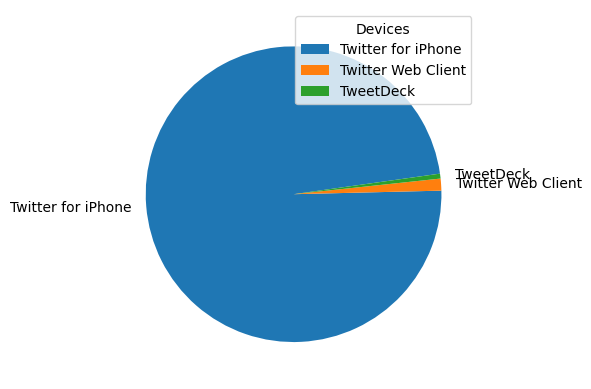

In [62]:
# Create a pie chart of the 'source' column distribution and display it with a legend
plt.pie(df['source'].value_counts(),labels=df['source'].unique(), startangle = 8)
plt.legend(title="Devices")
plt.show() 

#### The analysis of device/platform usage for posting tweets from the WeRateDogs account reveals a clear preference for Twitter for iPhone, which is the most frequently used platform. This is followed by Twitter Web Client and TweetDeck. This pattern suggests that the WeRateDogs team predominantly uses mobile devices for managing and posting their tweets, likely due to the convenience and accessibility provided by smartphones. The use of Twitter Web Client and TweetDeck indicates that desktop platforms are also utilized, possibly for more detailed management and analytics tasks.

### Insight 2: Most Common Dog Names

In [63]:
# Print the counts of the top 10 most common dog names in the DataFrame
name_counts = df['name'].value_counts().head(10)
print(name_counts)

Cooper     10
Lucy       10
Charlie    10
Tucker      9
Oliver      9
Penny       8
Winston     7
Daisy       7
Sadie       7
Koda        6
Name: name, dtype: int64


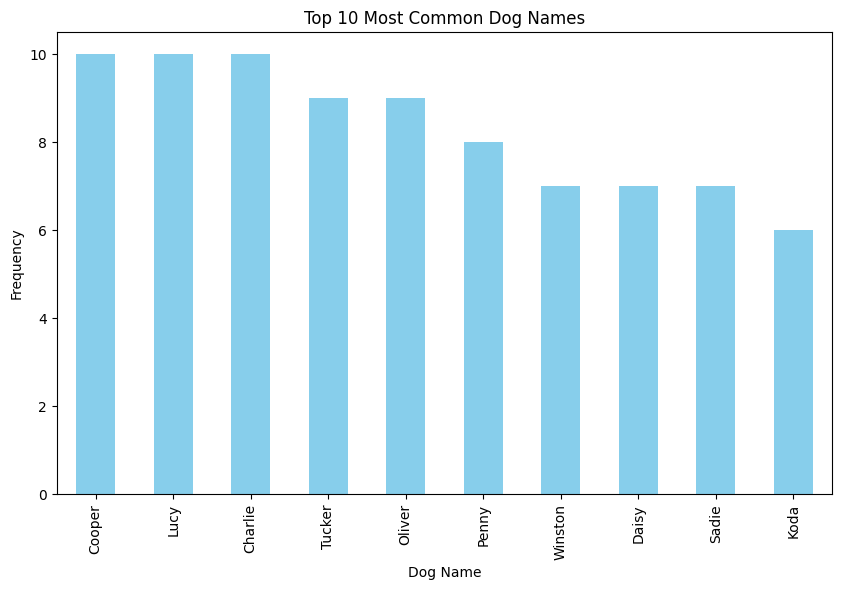

In [64]:
# Create and display a bar chart of the top 10 most common dog names with their frequencies
name_counts = df['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
name_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Dog Names')
plt.xlabel('Dog Name')
plt.ylabel('Frequency')
plt.show()

#### The analysis of dog names from the WeRateDogs dataset highlights several popular names, with "Cooper," "Lucy," and "Charlie" leading the list, each appearing 10 times. Other frequently mentioned names include "Tucker" and "Oliver," both appearing 9 times. The prevalence of these names suggests a trend towards popular and traditional names in the dog community. Names like "Penny," "Winston," "Daisy," and "Sadie" are also common, reflecting a diverse range of choices that resonate with pet owners.

### Insight 3: Dog Stages and Popularity

In [65]:
# Calculate average retweet and favorite counts for each dog stage
dog_stage_popularity = df.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean().reset_index()
print(dog_stage_popularity)

  dog_stage  retweet_count  favorite_count
0     doggo    6844.562500    19014.140625
1   floofer    4968.714286    13206.000000
2    pupper    2416.916667     7516.821429
3     puppo    6375.761905    21457.809524


C:\Users\zekob\AppData\Local\Temp\ipykernel_3684\1235388184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dog_stage', y='retweet_count', data=dog_stage_popularity, palette='viridis')
C:\Users\zekob\AppData\Local\Temp\ipykernel_3684\1235388184.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dog_stage', y='favorite_count', data=dog_stage_popularity, palette='viridis')


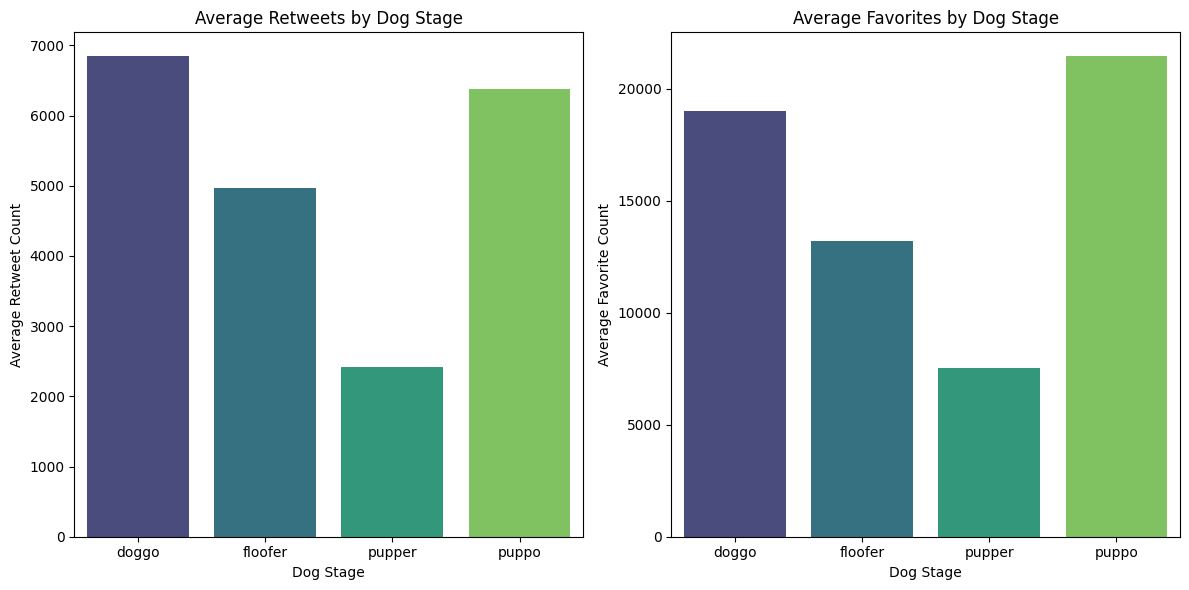

In [66]:
# Calculate average retweet and favorite counts for each dog stage
dog_stage_popularity = df.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean().reset_index()
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
# Plotting average retweet count by dog stage
plt.subplot(1, 2, 1)
sns.barplot(x='dog_stage', y='retweet_count', data=dog_stage_popularity, palette='viridis')
plt.title('Average Retweets by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Retweet Count')
# Plotting average favourite count by dog stage
plt.subplot(1, 2, 2)
sns.barplot(x='dog_stage', y='favorite_count', data=dog_stage_popularity, palette='viridis')
plt.title('Average Favorites by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Favorite Count')
plt.tight_layout()
plt.show()

#### The analysis of average retweet and favorite counts across different dog stages reveals distinct patterns in audience engagement:

**Doggo**: This stage garners the highest average engagement, with 6,844 retweets and 19,014 favorites. The high numbers suggest that tweets featuring doggos are particularly popular among followers.

**Floofer**: The floofer stage shows substantial engagement as well, with 4,969 retweets and 13,206 favorites. While not as high as doggos, floofers still attract significant attention.

**Pupper**: Puppies, or puppers, receive the lowest average engagement, with 2,417 retweets and 7,517 favorites. This may indicate less interaction compared to older or more established stages.

**Puppo**: Despite its relatively small presence, the puppo stage ranks highly in engagement with 6,376 retweets and 21,458 favorites. This suggests a strong appeal or interest in tweets about puppos.

Overall, tweets about doggos and puppos tend to attract more engagement compared to those featuring puppers and floofers.

### Insight 4: Most Common Dog Breeds

In [67]:
# Count the frequency of each predicted breed
breed_counts = df['breed'].value_counts()
print("Most Common Dog Breeds:")
print(breed_counts.head(10))  # Display the top 10 breeds


Most Common Dog Breeds:
Golden_Retriever      158
Labrador_Retriever    108
Pembroke               95
Chihuahua              91
Pug                    62
Toy_Poodle             51
Chow                   48
Samoyed                42
Pomeranian             42
Malamute               33
Name: breed, dtype: int64


C:\Users\zekob\AppData\Local\Temp\ipykernel_3684\776375614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=breed_counts.head(10).index, y=breed_counts.head(10).values, palette='plasma')


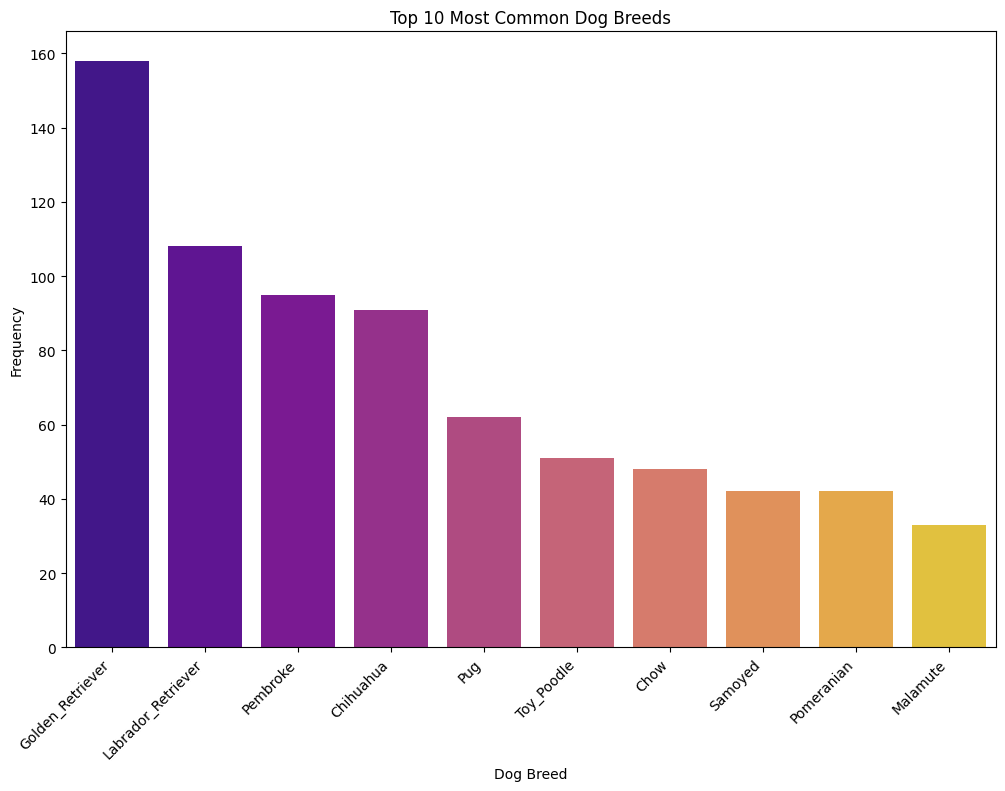

In [68]:
# Optional Visualization: Bar Plot of Most Common Predicted Dog Breeds
plt.figure(figsize=(12, 8))
sns.barplot(x=breed_counts.head(10).index, y=breed_counts.head(10).values, palette='plasma')
plt.title('Top 10 Most Common Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#### The analysis of the most frequently mentioned dog breeds in the dataset reveals a notable distribution of breed representation:

- **Golden Retriever** is the most common breed, appearing 158 times. This suggests that Golden Retrievers are prominently featured and highly recognized in the dataset.

- **Labrador Retriever** follows as the second most common breed with 108 mentions, indicating a significant presence and popularity.

- **Pembroke** and **Chihuahua** are also well-represented, with 95 and 91 mentions respectively, reflecting their popularity and frequent appearance.

- **Pug** and **Toy Poodle** each appear over 50 times, highlighting their continued prominence.

- **Chow**, **Samoyed**, **Pomeranian**, and **Malamute** round out the top breeds, with varying frequencies, showing a diverse range of breed representation in the dataset.

Overall, the dataset shows a clear preference for certain breeds, with Golden Retrievers and Labrador Retrievers being the most dominant. This reflects a high level of visibility and interest in these popular breeds within the dataset.

